# ANALISANDO O DATASET E VERIFICANDO DADOS NULOS

In [3]:
import pandas as pd
import numpy as np
import datetime # para trabalhar com datas

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BL-Flickr-Images-Book.csv to BL-Flickr-Images-Book.csv


In [3]:
#carregando dataframe

df = pd.read_csv("BL-Flickr-Images-Book.csv")

In [4]:
#conhecendo o dataset
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [5]:
#obtendo informações sobre o dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier              8287 non-null   int64  
 1   Edition Statement       773 non-null    object 
 2   Place of Publication    8287 non-null   object 
 3   Date of Publication     8106 non-null   object 
 4   Publisher               4092 non-null   object 
 5   Title                   8287 non-null   object 
 6   Author                  6509 non-null   object 
 7   Contributors            8287 non-null   object 
 8   Corporate Author        0 non-null      float64
 9   Corporate Contributors  0 non-null      float64
 10  Former owner            1 non-null      object 
 11  Engraver                0 non-null      float64
 12  Issuance type           8287 non-null   object 
 13  Flickr URL              8287 non-null   object 
 14  Shelfmarks              8287 non-null   

In [ ]:
#Removendo colunas 
colunas_retiradas = ['Corporate Author','Corporate Contributors','Former owner','Engraver','Edition Statement','Contributors','Issuance type','Shelfmarks']

df.drop(columns = colunas_retiradas, axis = 1, inplace = True)


In [9]:
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [10]:
#verificando novamente as informações do dataset ajustado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Identifier            8287 non-null   int64 
 1   Place of Publication  8287 non-null   object
 2   Date of Publication   8106 non-null   object
 3   Publisher             4092 non-null   object
 4   Title                 8287 non-null   object
 5   Author                6509 non-null   object
 6   Flickr URL            8287 non-null   object
dtypes: int64(1), object(6)
memory usage: 453.3+ KB


In [11]:
print(df['Identifier'].is_unique)

True


In [12]:
print(df['Identifier'].nunique())

8287


In [13]:
df.loc[1905:, 'Date of Publication'].head(10)

1905         1879
1906         1886
1907         1844
1908    1861-1909
1909         1884
1910         1885
1911         1834
1912         1837
1913         1867
1914         1830
Name: Date of Publication, dtype: object

In [15]:
#tratando as datas de publicação de cada um dos livros através das expressões regulares

expre_regular = r'^(\d{4})' #define a expreesão regular que deve ser utilizada para cada uma das datas de publicação(encontra o conjuto de 4 digitos)
extr = df['Date of Publication'].str.extract(expre_regular, expand = False)#aplica o modelo de extração através da expressão regular definida

In [20]:
df['Date of Publication'] = pd.to_numeric(extr)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Identifier            8287 non-null   int64  
 1   Place of Publication  8287 non-null   object 
 2   Date of Publication   7316 non-null   float64
 3   Publisher             4092 non-null   object 
 4   Title                 8287 non-null   object 
 5   Author                6509 non-null   object 
 6   Flickr URL            8287 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 453.3+ KB


In [23]:
df['Date of Publication'].isnull().sum() #retorna uma série com a resposta para pergunta (isnull?)

971

In [24]:
df['Date of Publication'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8282    False
8283    False
8284     True
8285    False
8286    False
Name: Date of Publication, Length: 8287, dtype: bool

In [25]:
df.dropna(subset = ['Date of Publication'], inplace = True)
df['Date of Publication'] = df['Date of Publication'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7316 entries, 0 to 8286
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Identifier            7316 non-null   int64 
 1   Place of Publication  7316 non-null   object
 2   Date of Publication   7316 non-null   int64 
 3   Publisher             3576 non-null   object
 4   Title                 7316 non-null   object
 5   Author                5782 non-null   object
 6   Flickr URL            7316 non-null   object
dtypes: int64(2), object(5)
memory usage: 457.2+ KB


In [28]:
df['Place of Publication'].head(10)

0                       London
1     London; Virtue & Yorston
2                       London
3                       London
4                       London
5                       London
6                       London
8                      London]
9                       London
10                    Coventry
Name: Place of Publication, dtype: object

In [31]:
df[df['Place of Publication'].str.contains('London')].head(10)

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
5,481,London,1875,William Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
6,519,London,1872,The Author,Lagonells. By the author of Darmayne (F. E. A....,"A., F. E.",http://www.flickr.com/photos/britishlibrary/ta...
8,874,London],1676,NaN,"A Warning to the inhabitants of England, and L...",Remaʿ.,http://www.flickr.com/photos/britishlibrary/ta...
9,1143,London,1679,NaN,A Satyr against Vertue. (A poem: supposed to b...,"A., T.",http://www.flickr.com/photos/britishlibrary/ta...
15,2854,London,1865,E. Moxon & Co.,"See-Saw; a novel ... Edited [or rather, writte...","ABATI, Francesco.",http://www.flickr.com/photos/britishlibrary/ta...


In [32]:
london = df['Place of Publication'].str.contains("London")
oxfor = df['Place of Publication'].str.contains('oxford')

In [34]:
df['Place of Publication'] = np.where(london, 'London',np.where(oxfor,'Oxford',df['Place of Publication'].str.replace('-',' ')))

In [35]:
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [36]:
df[df['Place of Publication'].str.contains('Oxford')]

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
480,192427,Oxford,1846,John Henry Parker,The Baptistery ... By the author of “The Cathe...,NaN,http://www.flickr.com/photos/britishlibrary/ta...
619,262687,Oxford,1887,Rowbottom & Son,The History of Constitutional Progress during ...,"BELLEWES, George Oliver - and DEVENISH (Willia...",http://www.flickr.com/photos/britishlibrary/ta...
1519,686597,Oxford,1818,[Clarendon Press,The History of Chilton in the County of Buking...,NaN,http://www.flickr.com/photos/britishlibrary/ta...
2184,962896,Oxford,1892,NaN,Notes on the Oxfordshire Domesday [with a summ...,NaN,http://www.flickr.com/photos/britishlibrary/ta...
2237,991105,Oxford,1897,Clarendon Press,"Hindu Manners, Customs and Ceremonies ... Tran...","DUBOIS, Jean Antoine.",http://www.flickr.com/photos/britishlibrary/ta...
2238,991106,Oxford,1899,Clarendon Press,"Hindu Manners, Customs, and Ceremonies ... Tra...","DUBOIS, Jean Antoine.",http://www.flickr.com/photos/britishlibrary/ta...
2521,1211883,Oxford,1895,B. H. Blackwell,A Short Constitutional History of England ... ...,"FEILDEN, Henry Saint Clair.",http://www.flickr.com/photos/britishlibrary/ta...
2628,1259903,Oxford,1895,Clarendon Press,An Introduction to Chemical Crystallography .....,"FOCK, Andreas.",http://www.flickr.com/photos/britishlibrary/ta...
2739,1341190,Oxford,1892,Clarendon Press,Wise Words and Quaint Counsels of Thomas Fulle...,"FULLER, Thomas - D.D., Prebendary of Salisbury",http://www.flickr.com/photos/britishlibrary/ta...
3187,1553618,Oxford,1640,W. Turner,"Sicily and Naples, or, the fatall union. A tra...","H., S. - A.B., e C. Ex",http://www.flickr.com/photos/britishlibrary/ta...


In [39]:
df[df['Place of Publication'] == 'Oxford]'] = 'Oxford'

In [41]:
df[df['Place of Publication'].str.contains("Oxford")]

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
480,192427,Oxford,1846,John Henry Parker,The Baptistery ... By the author of “The Cathe...,NaN,http://www.flickr.com/photos/britishlibrary/ta...
619,262687,Oxford,1887,Rowbottom & Son,The History of Constitutional Progress during ...,"BELLEWES, George Oliver - and DEVENISH (Willia...",http://www.flickr.com/photos/britishlibrary/ta...
1519,686597,Oxford,1818,[Clarendon Press,The History of Chilton in the County of Buking...,NaN,http://www.flickr.com/photos/britishlibrary/ta...
2184,962896,Oxford,1892,NaN,Notes on the Oxfordshire Domesday [with a summ...,NaN,http://www.flickr.com/photos/britishlibrary/ta...
2237,991105,Oxford,1897,Clarendon Press,"Hindu Manners, Customs and Ceremonies ... Tran...","DUBOIS, Jean Antoine.",http://www.flickr.com/photos/britishlibrary/ta...
2238,991106,Oxford,1899,Clarendon Press,"Hindu Manners, Customs, and Ceremonies ... Tra...","DUBOIS, Jean Antoine.",http://www.flickr.com/photos/britishlibrary/ta...
2521,1211883,Oxford,1895,B. H. Blackwell,A Short Constitutional History of England ... ...,"FEILDEN, Henry Saint Clair.",http://www.flickr.com/photos/britishlibrary/ta...
2628,1259903,Oxford,1895,Clarendon Press,An Introduction to Chemical Crystallography .....,"FOCK, Andreas.",http://www.flickr.com/photos/britishlibrary/ta...
2739,1341190,Oxford,1892,Clarendon Press,Wise Words and Quaint Counsels of Thomas Fulle...,"FULLER, Thomas - D.D., Prebendary of Salisbury",http://www.flickr.com/photos/britishlibrary/ta...
3187,1553618,Oxford,1640,W. Turner,"Sicily and Naples, or, the fatall union. A tra...","H., S. - A.B., e C. Ex",http://www.flickr.com/photos/britishlibrary/ta...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7316 entries, 0 to 8286
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Identifier            7316 non-null   object
 1   Place of Publication  7316 non-null   object
 2   Date of Publication   7316 non-null   object
 3   Publisher             3577 non-null   object
 4   Title                 7316 non-null   object
 5   Author                5784 non-null   object
 6   Flickr URL            7316 non-null   object
dtypes: object(7)
memory usage: 777.2+ KB




7316

# TRABALHANDO COM VALORES SEM SENTIDO

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [28]:
#importando novo dataset

pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
pima.drop(columns =['Pregnancies','Outcome'], axis = 1)[pima.eq(0).any(1)] #verificando onde existem valores "estranhos iguais a 0"

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [35]:
print((pima[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] == 0).sum())

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [36]:
pima[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = pima[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0, np.nan)

In [37]:
print((pima[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] == 0).sum())

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [40]:
pima.isnull().sum().sort_values(ascending = False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Outcome                       0
Age                           0
DiabetesPedigreeFunction      0
Pregnancies                   0
dtype: int64

In [39]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [41]:
df_new = pima.dropna()

In [42]:
df_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
df_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


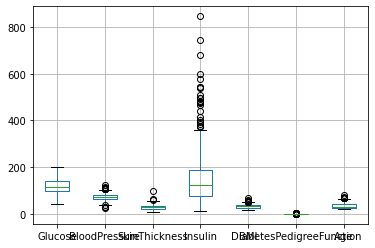

In [45]:
pima.boxplot(['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [46]:
pima_mean = pima.fillna(pima.mean())

In [47]:
pima_mean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
